In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [424]:
#데이터셋로드
x_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity_week.csv').sort_values(by='acc_id', ascending=True)
y_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)['label']

In [426]:
x_data = x_load
y_data = y_load

### mon / 2mon 필터

In [427]:
custom_filter = [v[0] or v[1] for v in zip(list((y_load == 'month').values), list((y_load == '2month').values))]
x_data = x_load[custom_filter]
y_data = y_load[custom_filter]

In [428]:
x_data

,Unnamed: 0,acc_id,label,gd_cnt,cnt_dt_1,play_time_1,npc_exp_1,npc_hongmun_1,quest_exp_1,quest_hongmun_1,...,cnt_clear_bam_8,normal_chat_8,whisper_chat_8,district_chat_8,party_chat_8,guild_chat_8,faction_chat_8,cnt_use_buffitem_8,gathering_cnt_8,making_cnt_8
3,3,00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...,month,0.0,3.0,-0.372831,0.065574,-0.261236,1.086231,1.381512,...,-0.03313,-0.034038,-0.145568,-0.016574,-0.275174,-0.343293,-0.024028,-0.438689,-0.027758,-0.365536
4,4,00037fe8e712041a476b8b1b827583cbc34895844057f0...,2month,0.0,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
5,5,0003b127aa1c0c34490db8817574482464aad9f99cffde...,month,0.0,7.0,-0.449948,-0.231874,-0.227129,-0.250423,-0.445818,...,-0.03313,-0.034038,-0.182536,-0.016574,-0.275174,-0.343293,-0.024028,-0.487441,-0.027758,-0.365536
6,6,0004733c4175d61e67d1ec9d3602f6c3341180800bc8bf...,month,0.0,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
7,7,00047f6584e6bcfed540e1bc53651c0c27f02c5bc53091...,2month,0.0,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
9,9,0006502148dc2533ef4ac4b9939ee19f18483a7c3c7256...,month,0.0,7.0,4.726790,10.018433,-0.173257,9.683568,7.608830,...,-0.03313,-0.034038,0.187146,-0.016574,-0.249250,-0.343293,-0.024028,1.359742,-0.027758,-0.365536
10,10,00069cf4d605e1daa0c75da487fc896121a1a0399c72c2...,2month,0.0,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
14,14,0008c8c21f194a7855fec7d3b92b99f873d191dfd30790...,2month,0.0,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.291225,-0.024028,-0.330349,-0.027758,-0.365536
16,16,000a6998e7fbd82fb6d5156cac86f9f86a43aafd6a0394...,2month,0.0,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
21,21,000e554991775d0e0a84548ff2592baab841b1895fae01...,2month,0.0,7.0,0.700355,-0.231874,-0.044636,-0.250423,-0.224659,...,-0.03313,-0.034038,0.482891,-0.016574,-0.266533,-0.343293,-0.024028,1.267654,-0.027758,-0.365536


In [429]:
x_data = x_data.drop(['Unnamed: 0','acc_id', 'label', 'gd_cnt'], axis=1)

In [430]:
x_data

,cnt_dt_1,play_time_1,npc_exp_1,npc_hongmun_1,quest_exp_1,quest_hongmun_1,item_hongmun_1,game_combat_time_1,get_money_1,duel_cnt_1,...,cnt_clear_bam_8,normal_chat_8,whisper_chat_8,district_chat_8,party_chat_8,guild_chat_8,faction_chat_8,cnt_use_buffitem_8,gathering_cnt_8,making_cnt_8
3,3.0,-0.372831,0.065574,-0.261236,1.086231,1.381512,-0.289734,-0.295725,-0.023524,-0.036168,...,-0.03313,-0.034038,-0.145568,-0.016574,-0.275174,-0.343293,-0.024028,-0.438689,-0.027758,-0.365536
4,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
5,7.0,-0.449948,-0.231874,-0.227129,-0.250423,-0.445818,-0.264804,-0.300103,-0.023504,-0.036168,...,-0.03313,-0.034038,-0.182536,-0.016574,-0.275174,-0.343293,-0.024028,-0.487441,-0.027758,-0.365536
6,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
7,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
9,7.0,4.726790,10.018433,-0.173257,9.683568,7.608830,-0.306354,3.290764,-0.023301,-0.036168,...,-0.03313,-0.034038,0.187146,-0.016574,-0.249250,-0.343293,-0.024028,1.359742,-0.027758,-0.365536
10,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
14,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.291225,-0.024028,-0.330349,-0.027758,-0.365536
16,0.0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
21,7.0,0.700355,-0.231874,-0.044636,-0.250423,-0.224659,-0.264804,0.696509,-0.023316,-0.036168,...,-0.03313,-0.034038,0.482891,-0.016574,-0.266533,-0.343293,-0.024028,1.267654,-0.027758,-0.365536


In [431]:
temp = []

for v in range(1,9):
    temp.append('play_time_' + str(v))
    temp.append('cnt_dt_' + str(v))
    temp.append('item_hongmun_' + str(v))
    temp.append('game_combat_time_' + str(v))
    
print(temp)

['play_time_1', 'cnt_dt_1', 'item_hongmun_1', 'game_combat_time_1', 'play_time_2', 'cnt_dt_2', 'item_hongmun_2', 'game_combat_time_2', 'play_time_3', 'cnt_dt_3', 'item_hongmun_3', 'game_combat_time_3', 'play_time_4', 'cnt_dt_4', 'item_hongmun_4', 'game_combat_time_4', 'play_time_5', 'cnt_dt_5', 'item_hongmun_5', 'game_combat_time_5', 'play_time_6', 'cnt_dt_6', 'item_hongmun_6', 'game_combat_time_6', 'play_time_7', 'cnt_dt_7', 'item_hongmun_7', 'game_combat_time_7', 'play_time_8', 'cnt_dt_8', 'item_hongmun_8', 'game_combat_time_8']


In [432]:
x_data = x_data[temp]

In [433]:
y_data

3         month
4        2month
5         month
6         month
7        2month
9         month
10       2month
14       2month
16       2month
21       2month
23        month
25        month
26       2month
27        month
28        month
29        month
33        month
41        month
47       2month
48        month
49        month
52       2month
53        month
55       2month
56       2month
59        month
61        month
62       2month
64       2month
66       2month
          ...  
99944    2month
99945    2month
99947    2month
99948    2month
99952    2month
99954    2month
99955    2month
99956     month
99957    2month
99958     month
99959     month
99960    2month
99961    2month
99962    2month
99966     month
99967    2month
99969    2month
99971    2month
99972     month
99976    2month
99977     month
99979    2month
99980    2month
99982    2month
99985     month
99986     month
99989    2month
99993    2month
99996    2month
99997     month
Name: label, Length: 500

## training, test set 구분

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

## 랜덤포레스트

In [435]:
forest = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1, max_depth=20)

In [436]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [437]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))

훈련 세트 정확도: 0.842


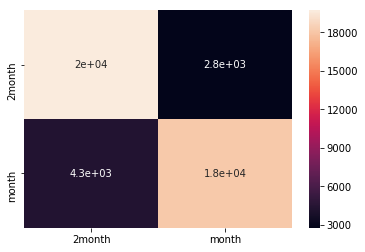

In [438]:
cm = pd.DataFrame(confusion_matrix(y_train, forest.predict(x_train)), columns=forest.classes_, index=forest.classes_)
sns.heatmap(cm, annot=True)

In [439]:
print(classification_report(y_train, forest.predict(x_train)))

             precision    recall  f1-score   support

     2month       0.82      0.88      0.85     22490
      month       0.87      0.81      0.84     22510

avg / total       0.84      0.84      0.84     45000



### 테스트 

In [440]:
print("테스트 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

테스트 세트 정확도: 0.709


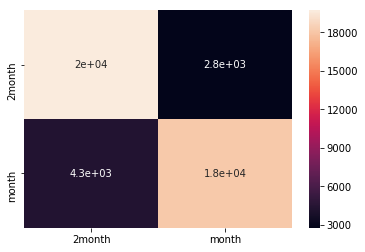

In [441]:
cm = pd.DataFrame(confusion_matrix(y_train, forest.predict(x_train)), columns=forest.classes_, index=forest.classes_)
sns.heatmap(cm, annot=True)

In [442]:
print(classification_report(y_test, forest.predict(x_test)))

             precision    recall  f1-score   support

     2month       0.69      0.76      0.72      2510
      month       0.73      0.66      0.69      2490

avg / total       0.71      0.71      0.71      5000

